<a href="https://colab.research.google.com/github/ejrtks1020/Deep_Learning/blob/main/CIFAR10_Custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

### CIFAR10 Dataset 생성 
* tf.keras.datasets의 cifar10.load_data()는 웹에서 Local computer로 Download후 train과 test용 image와 label array로 로딩. 

In [2]:
from tensorflow.keras.datasets import cifar10

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

170508288/170498071 [==============================] - 3s 0us/step
train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [3]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [4]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### CIFAR10 데이터 시각화
* 이미지 크기는 32x32이며 RGB채널. 
* 전반적으로 Label에 해당하는 대상이 이미지의 중앙에 있고, Label 대상 오브젝트 위주로 이미지가 구성. 

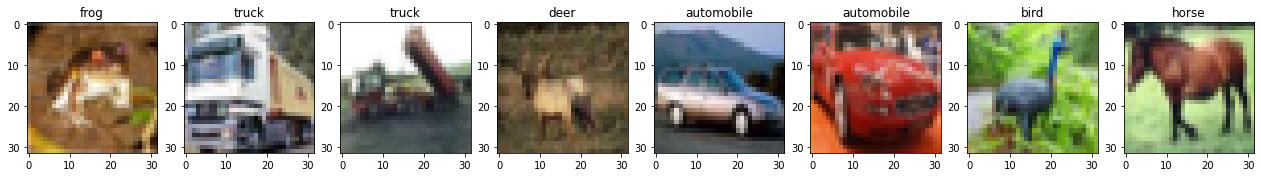

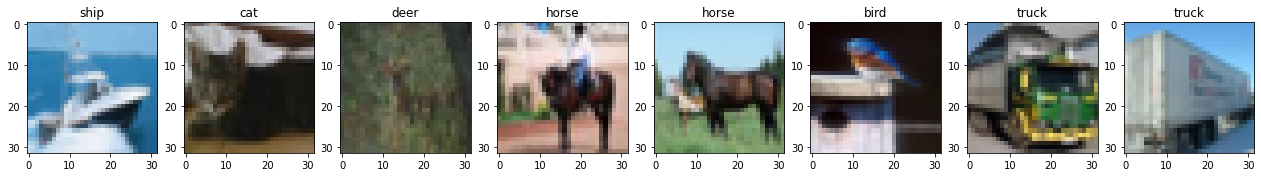

In [5]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### Data preprocessing
* image array의 0 ~ 255 사이의 값으로 되어 있는 pixel intensity 값을 0 ~ 1 사이 값으로 변환. 정수값 pixel 값을 255.0 으로 나눔. 
* label array는 숫자형 값으로 바꾸되, 원-핫 인코딩을 적용할지 선택. 일반적으로 원-핫 인코딩을 적용하는게 Keras Framework활용이 용이
* image array, label array 모두 float32 형으로 변환. numpy 의 float32는 tensor 변환시 tf.float32 로 변환되며 기본적으로 Tensorflow backend Keras는 tf.float32를 기반으로 함. 


In [6]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# label은 원-핫 인코딩이 Keras에서는 활용이 용이하나, 여기서는 sparse categorical crossentropy 테스트를 위해 적용하지 않음. 
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [7]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [8]:
# Keras는 CNN(정확히는 CNN 2D) 모델에 학습 데이터를 입력할 시 반드시 Image array는 4차원 배열이 되어야 함. 
# RGB 채널 이미지 array는 기본적으로 3차원임. 여기에 이미지의 갯수를 포함하므로 4차원이 됨.  
# 만일 Grayscale인 2차원 이미지 array라도 의도적으로 채널을 명시해서 3차원으로 만들어 주고, 여기에 이미지 개수를 포함해서 4차원이 됨. 

print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [9]:
# label 데이터가 2차원임. 이를 Keras 모델에 입력해도 별 문제없이 동작하지만, label의 경우는 OHE적용이 안되었는지를 알 수 있게 명확하게 1차원으로 표현해 주는것이 좋음. 
# 2차원인 labels 데이터를 1차원으로 변경. 
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

### Custom Model 생성
* CNN Model의 맨처음 Layer는 Input layer. Input layer의 shape를 이미지 사이즈와 RGB 3채널에 맞게 (32, 32, 3) 으로 설정.
* Conv 연산을 연달아 적용하고 MaxPooling을 적용하는 루틴으로 모델 생성. MaxPooling을 적용 후에는 필터 갯수를 더욱 증가 시킴. 
* MaxPooling 적용 후에 출력 피처맵의 사이즈는 작아지되, 채널(깊이)는 늘어나는 형태로 모델 생성. 
* CIFAR10의 Label수가 10개이므로 Classification을 위한 맨 마지막 Dense layer의 units 갯수는 10개임
* label값이 원-핫 인코딩 되지 않았기 때문에 model.compile()에서 loss는 반드시 sparse_categorical_crossentropy여야함. 
* 만일 label값이 원-핫 인코딩 되었다면 loss는 categorical_crossentropy 임. 

In [10]:
IMAGE_SIZE = 32

In [11]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                             

In [12]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이 아니므로 loss는 sparse_categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model 학습 수행 및 테스트 데이터로 평가 
* Model의 fit() 메소드를 호출하여 학습
* fit()은 학습 데이터가 Numpy array 자체로 들어올때, Generator 형태로 들어올때 약간의 수행로직 차이가 있음. 
* 인자로 x에는 학습 image data, y는 학습 label 데이터. 
* batch_size는 한번에 가져올 image/label array 갯수. 1개씩 가져오면 수행속도가 너무 느리고, 전체를 가져오면 GPU Memory 부족이 발생할 수 있으므로 적절한 batch_size 설정이 필요. 만약 학습 데이터가 generator일 경우, fit()에서 batch_size를 설정하지 않음. 
* epochs 는 전체 학습 데이터 학습을 반복 수행할 횟수
* steps_per_epoch는 전체 학습 데이터를 몇번 배치 작업으로 수행하는가를 의미. 보통 입력데이터가 generator일 경우 설정. 
* validation_data는 검증용 데이터 세트
* validation_steps는 검증용 데이터의 steps_per_epoch임. 
* validation_split는 validation_data로 별도의 검증용 데이터 세트를 설정하지 않고 자동으로 학습용 데이터에서 검증용 데이터 세트 분할. 


In [13]:
!nvidia-smi

Wed Jan  5 20:30:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    33W / 250W |    389MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15 )

Epoch 1/30
665/665 [==============================] - 13s 7ms/step - loss: 1.6788 - accuracy: 0.3750 - val_loss: 1.2883 - val_accuracy: 0.5268
Epoch 2/30
665/665 [==============================] - 5s 7ms/step - loss: 1.2063 - accuracy: 0.5647 - val_loss: 1.0503 - val_accuracy: 0.6143
Epoch 3/30
626/665 [===========================>..] - ETA: 0s - loss: 1.0087 - accuracy: 0.6427

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

### model.predict()를 통해 이미지 분류 예측
* 4차원 이미지 배열을 입력해서 모델학습함. predict()시에도 4차원 이미지 배열을 입력해야함. 
* 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의  

In [ ]:
# 아래 코드는 오류 발생. Conv2D를 사용한 모델에 4차원 이미지 배열을 입력해서 모델을 학습했으므로 predict()시에도 테스트용 4차원 이미지 배열을 입력해야 함.  
preds = model.predict(test_images[0])

In [ ]:
# 테스트용 4차원 이미지 배열을 입력해서 predict()수행. 
# predict()의 결과는 softmax 적용 결과임. 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의 
preds = model.predict(np.expand_dims(test_images[0], axis=0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

In [ ]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

In [22]:
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3 8 8 0 6 6 1 4 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5 2 4 0 9 6 6 5]


In [ ]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)

### 평균이 1 이고 표준편차가 1인 표준 정규분포에서 난수 추출
* 표준 편차가 클 수록 개별 값의 크기가 일반적으로 커짐.

In [ ]:
numbers = np.random.normal(loc=0.0,scale=1,size=[100, 100])
print(numbers)
print(numbers.mean())
print(numbers.std())
print(numbers.sum())

### Xavier initialization - 정규분포(glorot_normal), 균일분포(glorot_uniform) 

In [ ]:
# glorot_normal
fan_in = 20
fan_out = 15
scale_value = np.sqrt(2/(fan_in + fan_out))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

In [ ]:
# glorot_uniform
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in + fan_out))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

### He initialization - 정규분포(he_normal), 균일분포(he_uniform) 

In [ ]:
fan_in = 10
fan_out = 8
scale_value = np.sqrt(2/(fan_in))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

In [ ]:
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

### weight 초기화를 He Normal로 변경 후 성능 검증
* Keras Conv2D의 기본 weight 초기화는 glorot_uniform임. 이를 he_normal로 변경 후 동일 모델로 성능 테스트 
* label은 원-핫 인코딩을 적용 

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np


def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    labels = labels.squeeze()
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
print(train_images.shape, train_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
IMAGE_SIZE = 32
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                             

In [6]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15 )

Epoch 1/30
665/665 [==============================] - 6s 7ms/step - loss: 1.6064 - accuracy: 0.4065 - val_loss: 1.2081 - val_accuracy: 0.5585
Epoch 2/30
665/665 [==============================] - 5s 7ms/step - loss: 1.1625 - accuracy: 0.5834 - val_loss: 0.9716 - val_accuracy: 0.6437
Epoch 3/30
665/665 [==============================] - 4s 7ms/step - loss: 0.9551 - accuracy: 0.6630 - val_loss: 0.8785 - val_accuracy: 0.6917
Epoch 4/30
665/665 [==============================] - 5s 7ms/step - loss: 0.8348 - accuracy: 0.7083 - val_loss: 0.8191 - val_accuracy: 0.7137
Epoch 5/30
665/665 [==============================] - 5s 7ms/step - loss: 0.7496 - accuracy: 0.7372 - val_loss: 0.7166 - val_accuracy: 0.7505
Epoch 6/30
665/665 [==============================] - 5s 7ms/step - loss: 0.6676 - accuracy: 0.7664 - val_loss: 0.6707 - val_accuracy: 0.7663
Epoch 7/30
665/665 [==============================] - 5s 7ms/step - loss: 0.6188 - accuracy: 0.7819 - val_loss: 0.6443 - val_accuracy: 0.7785
Epoch 

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()

313/313 [==============================] - 1s 3ms/step - loss: 0.7318 - accuracy: 0.7904


[0.7318275570869446, 0.7904000282287598]

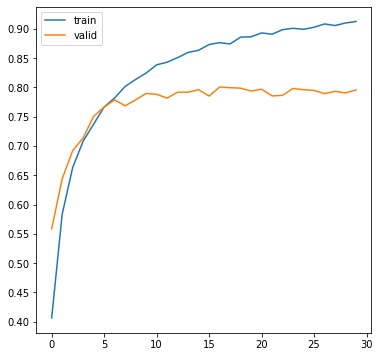

In [10]:
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_oh_labels)

### Batch Normalization을 모델에 적용 후 성능 검증

In [11]:
import tensorflow as tf
import numpy as np
import random as python_random

np.random.seed(2021)
python_random.seed(2021)
tf.random.set_seed(2021)

In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [13]:
# label값이 원-핫 인코딩이 아니므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 6s 8ms/step - loss: 1.5736 - accuracy: 0.4296 - val_loss: 1.2199 - val_accuracy: 0.5564
Epoch 2/30
665/665 [==============================] - 5s 8ms/step - loss: 1.1146 - accuracy: 0.6031 - val_loss: 0.9905 - val_accuracy: 0.6472
Epoch 3/30
665/665 [==============================] - 5s 8ms/step - loss: 0.9283 - accuracy: 0.6740 - val_loss: 1.2866 - val_accuracy: 0.5820
Epoch 4/30
665/665 [==============================] - 5s 8ms/step - loss: 0.8101 - accuracy: 0.7183 - val_loss: 0.8085 - val_accuracy: 0.7121
Epoch 5/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7225 - accuracy: 0.7489 - val_loss: 0.7674 - val_accuracy: 0.7397
Epoch 6/30
665/665 [==============================] - 5s 8ms/step - loss: 0.6550 - accuracy: 0.7739 - val_loss: 1.0278 - val_accuracy: 0.6909
Epoch 7/30
665/665 [==============================] - 5s 8ms/step - loss: 0.5977 - accuracy: 0.7937 - val_loss: 1.0110 - val_accuracy: 0.6764
Epoch 

In [14]:
model.evaluate(test_images, test_oh_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.7301 - accuracy: 0.8156


[0.7300921082496643, 0.8155999779701233]

### He Normal 적용 후 Batch Normalization

In [15]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [16]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 6s 8ms/step - loss: 1.5706 - accuracy: 0.4336 - val_loss: 1.3330 - val_accuracy: 0.5147
Epoch 2/30
665/665 [==============================] - 5s 8ms/step - loss: 1.1291 - accuracy: 0.5924 - val_loss: 1.0719 - val_accuracy: 0.6193
Epoch 3/30
665/665 [==============================] - 5s 8ms/step - loss: 0.9363 - accuracy: 0.6684 - val_loss: 1.0130 - val_accuracy: 0.6533
Epoch 4/30
665/665 [==============================] - 5s 8ms/step - loss: 0.8163 - accuracy: 0.7156 - val_loss: 0.7718 - val_accuracy: 0.7301
Epoch 5/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7321 - accuracy: 0.7443 - val_loss: 1.0647 - val_accuracy: 0.6700
Epoch 6/30
665/665 [==============================] - 5s 8ms/step - loss: 0.6693 - accuracy: 0.7676 - val_loss: 0.7128 - val_accuracy: 0.7495
Epoch 7/30
665/665 [==============================] - 5s 8ms/step - loss: 0.6054 - accuracy: 0.7908 - val_loss: 0.6948 - val_accuracy: 0.7591
Epoch 

In [17]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 1s 4ms/step - loss: 0.7933 - accuracy: 0.8146


[0.7933454513549805, 0.8145999908447266]

In [18]:
preds = model.predict(np.expand_dims(test_images[0], axis=0))
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3]


### 학습 시 데이터를 섞는 shuffle 적용 유무에 따른  성능 테스트

In [19]:
import tensorflow as tf
import numpy as np
import random as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# seed 를 설정해서 학습시마다 동일한 결과 유도. 불행히도 의도한 대로 동작하지 않음. 
def set_random_seed(seed_value):
    np.random.seed(seed_value)
    python_random.seed(seed_value)
    tf.random.set_seed(seed_value)

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 

In [20]:
from tensorflow.keras.datasets import cifar10

# random seed는 2021로 고정.
set_random_seed(2021)
# CIFAR10 데이터 재 로딩 및 Scaling/OHE 전처리 적용하여 학습/검증/데이터 세트 생성. 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(42500, 32, 32, 3) (42500, 10) (7500, 32, 32, 3) (7500, 10) (10000, 32, 32, 3) (10000, 10)


### model 생성을 위한 별도 함수 생성

In [21]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    #x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    # cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
    x = Flatten(name='flatten')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu', name='fc1')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(10, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    #model.summary()
    
    return model


### shuffle을 False/True 변경하면서 테스트 

In [22]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# 먼저 shuffle을 false로 테스트 
noshuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=30, shuffle=False, 
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=64)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

# model이 반복적으로 메모리 차지하는것을 없애기 위해서 수행. 
tf.keras.backend.clear_session()

Epoch 1/30
665/665 [==============================] - 6s 8ms/step - loss: 1.5656 - accuracy: 0.4331 - val_loss: 1.4790 - val_accuracy: 0.4725
Epoch 2/30
665/665 [==============================] - 5s 8ms/step - loss: 1.1145 - accuracy: 0.6043 - val_loss: 1.0644 - val_accuracy: 0.6289
Epoch 3/30
665/665 [==============================] - 5s 8ms/step - loss: 0.9205 - accuracy: 0.6764 - val_loss: 0.7982 - val_accuracy: 0.7196
Epoch 4/30
665/665 [==============================] - 5s 8ms/step - loss: 0.8017 - accuracy: 0.7211 - val_loss: 0.8631 - val_accuracy: 0.7020
Epoch 5/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7107 - accuracy: 0.7532 - val_loss: 0.7421 - val_accuracy: 0.7483
Epoch 6/30
665/665 [==============================] - 5s 8ms/step - loss: 0.6444 - accuracy: 0.7754 - val_loss: 0.7642 - val_accuracy: 0.7408
Epoch 7/30
665/665 [==============================] - 5s 8ms/step - loss: 0.5841 - accuracy: 0.7959 - val_loss: 0.7863 - val_accuracy: 0.7473
Epoch 

### shuffle을 True로 변경하고 학습 및 테스트

In [23]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# shuffle을 True로 변경하여 학습 및 테스트
shuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=30, shuffle=True, 
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=64)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

tf.keras.backend.clear_session()

Epoch 1/30
665/665 [==============================] - 6s 8ms/step - loss: 1.5693 - accuracy: 0.4323 - val_loss: 1.3692 - val_accuracy: 0.5111
Epoch 2/30
665/665 [==============================] - 5s 8ms/step - loss: 1.1031 - accuracy: 0.6056 - val_loss: 0.9669 - val_accuracy: 0.6504
Epoch 3/30
665/665 [==============================] - 5s 8ms/step - loss: 0.9177 - accuracy: 0.6770 - val_loss: 0.9279 - val_accuracy: 0.6719
Epoch 4/30
665/665 [==============================] - 5s 8ms/step - loss: 0.8084 - accuracy: 0.7178 - val_loss: 0.8668 - val_accuracy: 0.6968
Epoch 5/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7298 - accuracy: 0.7492 - val_loss: 0.7733 - val_accuracy: 0.7331
Epoch 6/30
665/665 [==============================] - 5s 8ms/step - loss: 0.6566 - accuracy: 0.7759 - val_loss: 0.8554 - val_accuracy: 0.7141
Epoch 7/30
665/665 [==============================] - 5s 8ms/step - loss: 0.5964 - accuracy: 0.7962 - val_loss: 0.7205 - val_accuracy: 0.7573
Epoch 

### 위에서 수행한 Shuffle테스트 시 validation 데이터 기반 성능 검증 시각화 

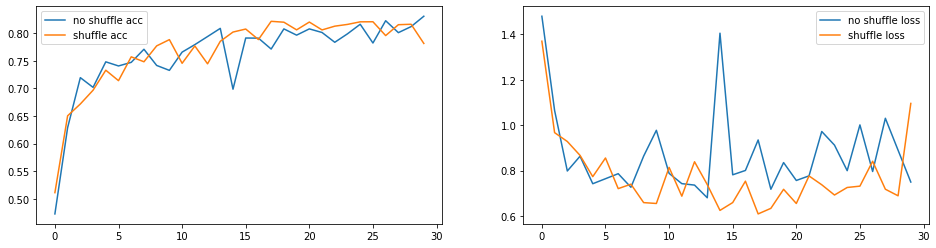

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_shuffle(noshuffle_history, shuffle_history):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    # shuffle과 no shuffle의 validation accuracy 비교 
    axs[0].plot(noshuffle_history.history['val_accuracy'], label='no shuffle acc')
    axs[0].plot(shuffle_history.history['val_accuracy'], label='shuffle acc')
    # shuffle과 no shuffle의 validation loss 비교 
    axs[1].plot(noshuffle_history.history['val_loss'], label='no shuffle loss')
    axs[1].plot(shuffle_history.history['val_loss'], label='shuffle loss')
    axs[0].legend()
    axs[1].legend()

show_history_shuffle(noshuffle_history, shuffle_history)


### batch 크기를 32, 64, 256, 512로 변경하면서 테스트

In [25]:
b_sizes = [32, 64, 256, 512]
histories = []
evaluations = []
for b_size in b_sizes:
    model = create_model()
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    # batch_size를 순차적으로 32, 64, 256, 512로 변경하여 학습 및 evaluation 수행. 
    print('##### batch size :', b_size, '학습 #####')
    history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=b_size, epochs=30, 
                        shuffle=True, validation_data=(val_images, val_oh_labels))
    # batch size별 학습 history 결과 저장. 
    histories.append(history)
    # 테스트 세트로 evaluation 수행하고 batch size별 결과 저장. 
    evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=b_size)
    print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)
    evaluations.append(evaluation_result)
    
    tf.keras.backend.clear_session()

##### batch size : 32 학습 #####
Epoch 1/30
1329/1329 [==============================] - 10s 7ms/step - loss: 1.5638 - accuracy: 0.4370 - val_loss: 1.2746 - val_accuracy: 0.5453
Epoch 2/30
1329/1329 [==============================] - 9s 6ms/step - loss: 1.1097 - accuracy: 0.6077 - val_loss: 1.0078 - val_accuracy: 0.6487
Epoch 3/30
1329/1329 [==============================] - 9s 7ms/step - loss: 0.9133 - accuracy: 0.6805 - val_loss: 0.9634 - val_accuracy: 0.6763
Epoch 4/30
1329/1329 [==============================] - 8s 6ms/step - loss: 0.8045 - accuracy: 0.7217 - val_loss: 0.7139 - val_accuracy: 0.7564
Epoch 5/30
1329/1329 [==============================] - 8s 6ms/step - loss: 0.7164 - accuracy: 0.7565 - val_loss: 0.8334 - val_accuracy: 0.7223
Epoch 6/30
1329/1329 [==============================] - 9s 7ms/step - loss: 0.6493 - accuracy: 0.7801 - val_loss: 0.7361 - val_accuracy: 0.7491
Epoch 7/30
1329/1329 [==============================] - 8s 6ms/step - loss: 0.5893 - accuracy: 0.7993 - 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_batch(histories):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))  
    # batch 크기별 validation accuracy 비교 
    axs[0].plot(histories[0].history['val_accuracy'], label='batch 32 acc')
    axs[0].plot(histories[1].history['val_accuracy'], label='batch 64 acc')
    axs[0].plot(histories[2].history['val_accuracy'], label='batch 256 acc')
    axs[0].plot(histories[3].history['val_accuracy'], label='batch 512 acc')
    
    # batch 크기별 validation loss 비교
    axs[1].plot(histories[0].history['val_loss'], label='batch 32 loss')
    axs[1].plot(histories[1].history['val_loss'], label='batch 64 loss')
    axs[1].plot(histories[2].history['val_loss'], label='batch 256 loss')
    axs[1].plot(histories[3].history['val_loss'], label='batch 512 loss')
    
    axs[0].legend()
    axs[1].legend()

show_history_batch(histories)